In [132]:
import pandas as pd
import numpy as np

In [75]:
rating_df = pd.read_csv("ratings_Electronics.csv",names=['UserId','ProductId','Ratings','Timestamp'])

In [76]:
rating_df.head()

,UserId,ProductId,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [77]:
rating_df.shape

(7824482, 4)

In [78]:
rating_df.dtypes

UserId        object
ProductId     object
Ratings      float64
Timestamp      int64
dtype: object

In [79]:
rating_df.drop('Timestamp', axis=1, inplace=True)

In [80]:
rating_df.isnull().sum()

UserId       0
ProductId    0
Ratings      0
dtype: int64

In [81]:
rating_df['ProductId'].nunique()

476002

In [82]:
rating_df['UserId'].nunique()

4201696

In [83]:
rating_df['Ratings'].unique()

array([5., 1., 3., 2., 4.])

In [84]:
rating_df['Ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Ratings, dtype: int64

In [85]:
rating_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ratings,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [86]:
rating_df['Ratings'].min()

1.0

In [87]:
rating_df['Ratings'].max()

5.0

In [88]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Ratings')

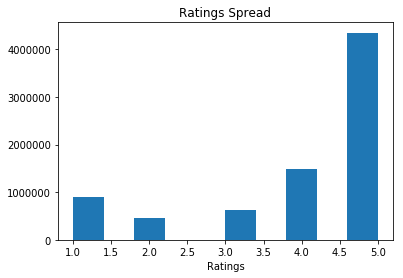

In [89]:
plt.hist(rating_df['Ratings'])
plt.title('Ratings Spread')
plt.xlabel('Ratings')

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


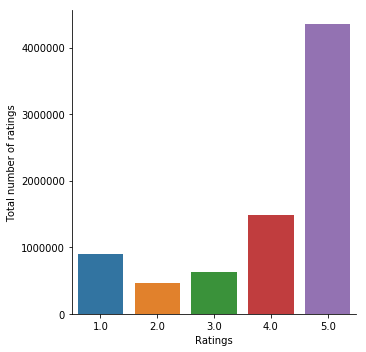

In [90]:
import seaborn as sns
g = sns.factorplot("Ratings", data=rating_df, kind='count')
g.set_ylabels("Total number of ratings")

In [91]:
print('Number of unique USERS in Raw data = ', rating_df['UserId'].nunique())
print('Number of unique ITEMS in Raw data = ', rating_df['ProductId'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002


In [92]:
#Top 10 products purchased (rated)
rating_df['ProductId'].value_counts().head(10)

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
Name: ProductId, dtype: int64

In [93]:
#Top 10 products having highest rating count
rating_df.groupby(['ProductId']).sum().sort_values(by='Ratings',ascending=False)[['Ratings']].head(10)

,Ratings
ProductId,
B0074BW614,81943.0
B00DR0PDNE,64681.0
B007WTAJTO,62697.0
B0019EHU8G,58409.0
B006GWO5WK,52751.0
B003ELYQGG,51028.0
B003ES5ZUU,48346.0
B007R5YDYA,46473.0
B00622AG6S,43419.0


### EDA
1. No. of Unique users in the dataset = 4201696
2. no of unique items in the dataset = 476002
3. Ratings are providing to 7824482 records scaling for min rating 1 to max rating 5
4. There are no null data or NA or missing values
5. From the graph we see most of the ratings are 5 for higest number of the items(products)
6. Top 10 products having highest rating(above code)
7. Top 10 products purchased and rated (listed above)

# Take a subset of the dataset to make it less sparse/ denser.

In [94]:
#taking users who have give minimum 50 ratings
most_rated = rating_df.groupby('UserId').size().sort_values(ascending=False)[:10]
most_rated

UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [95]:
counts = rating_df['UserId'].value_counts()
amazon_users_50_ratings_df = rating_df[rating_df['UserId'].isin(counts[counts >= 50].index)]

In [96]:
amazon_users_50_ratings_df.shape

(125871, 3)

In [97]:
print('Number of users who have rated 50 or more items =', len(amazon_users_50_ratings_df))
print('Number of unique USERS in final data = ', amazon_users_50_ratings_df['UserId'].nunique())
print('Number of unique ITEMS in final data = ', amazon_users_50_ratings_df['ProductId'].nunique())

Number of users who have rated 50 or more items = 125871
Number of unique USERS in final data =  1540
Number of unique ITEMS in final data =  48190


# Split the data randomly into train and test dataset.

In [108]:

from sklearn.model_selection import train_test_split
from surprise import Dataset  
import random 
from surprise import Reader, Dataset

In [109]:
train_set, test_set = train_test_split(amazon_users_50_ratings_df, test_size=.30)

# Popularity based model

In [110]:
#All the products in the dataset have ratings (least being 1 and max being 5). Below are the top 10 popular products based on the cummulative ratings
rating_df.groupby(['ProductId']).sum().sort_values(by='Ratings',ascending=False)[['Ratings']].head(10)

,Ratings
ProductId,
B0074BW614,81943.0
B00DR0PDNE,64681.0
B007WTAJTO,62697.0
B0019EHU8G,58409.0
B006GWO5WK,52751.0
B003ELYQGG,51028.0
B003ES5ZUU,48346.0
B007R5YDYA,46473.0
B00622AG6S,43419.0


In [112]:
train_set.head()

,UserId,ProductId,Ratings
3180058,AW5JSQCHC2ZJO,B003A5TX82,5.0
5858251,A34BZM6S9L7QI4,B007PZYBTY,5.0
263153,A20951I210L0IB,B00008ZLHG,4.0
900801,A1ROUMJOGO4QMB,B000F1WBUG,1.0
91543,A1EH2S92FHWZRP,B00005AT7Y,5.0


In [115]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped_rs = train_set.groupby('ProductId').agg({'UserId': 'count'}).reset_index()
train_data_grouped_rs.rename(columns = {'UserId': 'score'},inplace=True)
train_data_grouped_rs.head()

,ProductId,score
0,0970407998,1
1,0972683275,2
2,1400501466,4
3,1400501520,1
4,1400501776,2


In [117]:
#Sort the products on recommendation score 
train_data_sort_rs = train_data_grouped_rs.sort_values(['score', 'ProductId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort_rs['Rank'] = train_data_sort_rs['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations_rs = train_data_sort_rs.head(5) 
popularity_recommendations_rs

,ProductId,score,Rank
30802,B0088CJT4U,151,1.0
19568,B003ES5ZUU,130,2.0
30214,B007WTAJTO,112,3.0
8629,B000N99BBC,111,4.0
30496,B00829TIEK,105,5.0


In [118]:
def recommend(user_id):     
    user_recommendations_rs = popularity_recommendations_rs 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations_rs['UserId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations_rs.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations_rs = user_recommendations_rs[cols] 
          
    return user_recommendations_rs

In [121]:
find_recom = [15,200,875]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

Here is the recommendation for the userId: 15

       user_id   ProductId  score  Rank
30802       15  B0088CJT4U    151   1.0
19568       15  B003ES5ZUU    130   2.0
30214       15  B007WTAJTO    112   3.0
8629        15  B000N99BBC    111   4.0
30496       15  B00829TIEK    105   5.0


Here is the recommendation for the userId: 200

       user_id   ProductId  score  Rank
30802      200  B0088CJT4U    151   1.0
19568      200  B003ES5ZUU    130   2.0
30214      200  B007WTAJTO    112   3.0
8629       200  B000N99BBC    111   4.0
30496      200  B00829TIEK    105   5.0


Here is the recommendation for the userId: 875

       user_id   ProductId  score  Rank
30802      875  B0088CJT4U    151   1.0
19568      875  B003ES5ZUU    130   2.0
30214      875  B007WTAJTO    112   3.0
8629       875  B000N99BBC    111   4.0
30496      875  B00829TIEK    105   5.0




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
## Observations 
# Since this is a popularity-based recommender model, recommendations remain the same for all users
# We predict the products based on the popularity. It is not personalized to particular user

# Collaborative Filtering Model - Matrix Factorization

In [128]:
collab_filtering = pd.concat([train_set, test_set]).reset_index()

In [127]:
collab_filtering.head()

,index,UserId,ProductId,Ratings
0,3180058,AW5JSQCHC2ZJO,B003A5TX82,5.0
1,5858251,A34BZM6S9L7QI4,B007PZYBTY,5.0
2,263153,A20951I210L0IB,B00008ZLHG,4.0
3,900801,A1ROUMJOGO4QMB,B000F1WBUG,1.0
4,91543,A1EH2S92FHWZRP,B00005AT7Y,5.0


In [126]:
collab_filtering.tail()

,index,UserId,ProductId,Ratings
125866,2476375,A37PV5GMP2ILJC,B00284ADXA,4.0
125867,4068790,A1ODOGXEYECQQ8,B004FEEZLC,4.0
125868,5175135,A781ITP3HE2N5,B005SMD5RU,5.0
125869,5724389,A2JCJJNY43QQIV,B007EPMRKK,4.0
125870,1641861,A20DZX38KRBIT8,B0013FLTNS,5.0


In [133]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 
pivot_df_rs = collab_filtering.pivot(index = 'UserId', columns ='ProductId', values = 'Ratings').fillna(0)
print(pivot_df_rs.shape)
pivot_df_rs.head()

(1540, 48190)


ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:

pivot_df_rs['user_index'] = np.arange(0, pivot_df_rs.shape[0], 1)
pivot_df_rs.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
UserId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [135]:

pivot_df_rs.set_index(['user_index'], inplace=True)

In [136]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df_rs, k = 50)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [137]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df_rs = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df_rs.columns)
preds_df_rs.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [138]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df_rs, preds_df_rs, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df_rs.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df_rs.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [139]:
userID = 15
num_recommendations = 5
recommend_items(userID, pivot_df_rs, preds_df_rs, num_recommendations)


Below are the recommended items for user(user_id = 15):

                   user_ratings  user_predictions
Recommended Items                                
B007WTAJTO                  0.0          0.335415
B000QUUFRW                  0.0          0.281862
B002WE6D44                  0.0          0.228786
B00004ZCJE                  0.0          0.193438
B001XURP7W                  0.0          0.170882


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [140]:
userID = 200
num_recommendations = 5
recommend_items(userID, pivot_df_rs, preds_df_rs, num_recommendations)


Below are the recommended items for user(user_id = 200):

                   user_ratings  user_predictions
Recommended Items                                
B008X9Z8NE                  0.0          1.141688
B0079UAT0A                  0.0          1.101302
B008X9Z528                  0.0          1.072300
B004CLYEFK                  0.0          1.025798
B008X9Z7N0                  0.0          1.002051


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [141]:
userID = 875
num_recommendations = 5
recommend_items(userID, pivot_df_rs, preds_df_rs, num_recommendations)


Below are the recommended items for user(user_id = 875):

                   user_ratings  user_predictions
Recommended Items                                
B00829TIEK                  0.0          1.916547
B008DWCRQW                  0.0          0.742147
B00BOHNYTW                  0.0          0.709025
B009NHWVIA                  0.0          0.690975
B0097CXWUW                  0.0          0.678937


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


# Evaluate the above model

In [145]:
final_ratings_matrix_rs = amazon_users_50_ratings_df.pivot(index = 'UserId', columns ='ProductId', values = 'Ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix_rs.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix_rs)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix_rs.shape[0] * final_ratings_matrix_rs.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


In [147]:
final_ratings_matrix_rs.mean().head()

ProductId
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [148]:
preds_df_rs.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [149]:
rmse_df_rs = pd.concat([final_ratings_matrix_rs.mean(), preds_df_rs.mean()], axis=1)
rmse_df_rs.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df_rs.shape)
rmse_df_rs['item_index'] = np.arange(0, rmse_df_rs.shape[0], 1)
rmse_df_rs.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
ProductId,,,
0594451647,0.003247,0.001953,0
0594481813,0.001948,0.002875,1
0970407998,0.003247,0.003355,2
0972683275,0.012338,0.010343,3
1400501466,0.012987,0.004871,4


In [150]:
RMSE = round((((rmse_df_rs.Avg_actual_ratings - rmse_df_rs.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00275 



# Get top - K ( K = 5) recommendations

In [153]:
userID = 875
num_recommendations = 5
recommend_items(userID, pivot_df_rs, preds_df_rs, num_recommendations)


Below are the recommended items for user(user_id = 875):

                   user_ratings  user_predictions
Recommended Items                                
B00829TIEK                  0.0          1.916547
B008DWCRQW                  0.0          0.742147
B00BOHNYTW                  0.0          0.709025
B009NHWVIA                  0.0          0.690975
B0097CXWUW                  0.0          0.678937


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [154]:
userID = 420
num_recommendations = 5
recommend_items(userID, pivot_df_rs, preds_df_rs, num_recommendations)


Below are the recommended items for user(user_id = 420):

                   user_ratings  user_predictions
Recommended Items                                
B007WTAJTO                  0.0          0.848944
B001TH7GUU                  0.0          0.775751
B005CT56F8                  0.0          0.739852
B004G6002M                  0.0          0.523779
B005FYNSPK                  0.0          0.492058


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


# Summary



Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.You can see the differance above for the user id 875 & 420, The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history


Deep finding
For the userId 420
For the user A3TAS1AG6FMBQW, the 5 products recommended by the model are new products which are not already rated by the user. We will recommend these  5 products for the user -
User Id = A3TAS1AG6FMBQW 
Product Ids ['B007WTAJTO', 'B001TH7GUU', 'B005CT56F8', 'B004G6002M', 'B00004Z6KW']